<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/DSPS_HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 2 Part 2

In [8]:
from __future__ import print_function
__author__='fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")

distributions = ['chisq']
mymean = 100

Populating the interactive namespace from numpy and matplotlib


Chi Squared Distribution


In [0]:
distributions = ['chisq']

In [0]:
mymean = 100

In [0]:
df = mymean

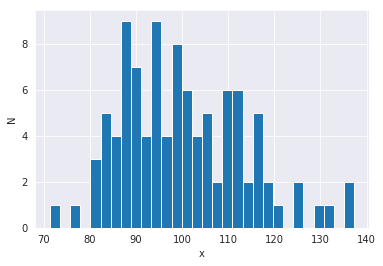

In [12]:
import numpy as np
np.random.seed(456)
md = {}
md['chisq'] = np.random.chisquare(mymean, size=100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Figure 1: a randomized Chi squared distribution of a sample size of 100 and mean of 100. 

In [13]:
print("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md["chisq"].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [14]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

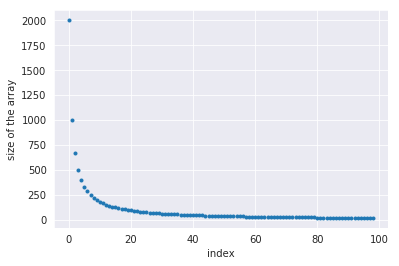

In [15]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 2: A graphical representation of distributions with different sizes. As the index decreases, the size of the array increases and vice versa. 

Text(1259.3999999999999, 100, 'expected mean')

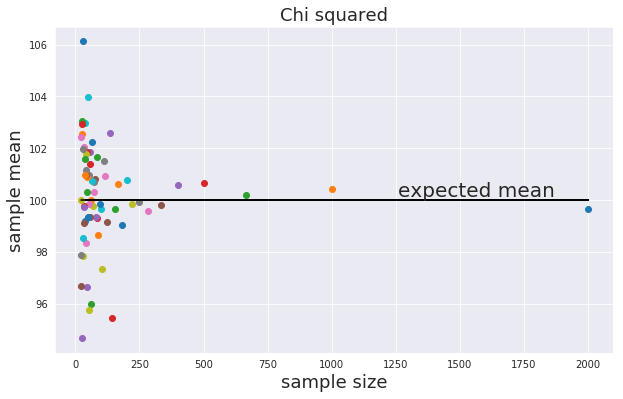

In [16]:
md['chisq'] = {}

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
  if not type(nn) == str:
    md['chisq']['means'][nn] = md['chisq'][nn].mean()
    axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size', fontsize=18)
    axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
    axchisq_mu_n.set_title('Chi squared', fontsize=18)
    axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                 va="bottom", fontsize=20)


Figure 3: In this figure, there is a large distribution of points ranging from 0 to 2000. Concentrated around 0, there are more points than around 2000. Due to the amount of points present, we can relate this to the law of large numbers claiming that the more times a test is performed (or the larger the population), the more accurate the mean will be. Because of this, we can conclude that the larger the sample size (i.e the one point directly on the mean), the close to the mean the point will be. 

Text(0, 0.5, 'N')

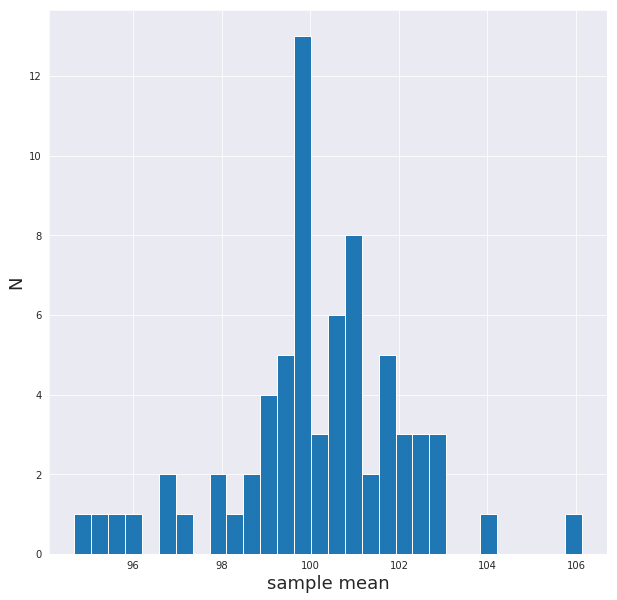

In [17]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 4: Histogram of the mean of all samples of the Chi Squared distribution. Compared to the other histograms, this has a much smaller range of values. Due to this, we can conclude that as the population approaches infinity, the mean will approach a singular value, which can be approximated by this graph as a value around 100. 

Normal Distribution

In [0]:
distributions = ['lnorm']

In [0]:
mymean = 100

In [0]:
df = mymean

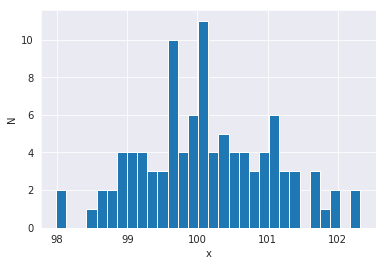

In [21]:
import numpy as np
np.random.seed(456)
md = {}
md['lnorm'] = np.random.normal(mymean, size=100)
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Figure 5: A randomized Normal Gaussian distribution for a sample size of 100 and a mean of 100. 

In [22]:
print("Lnorm mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md["lnorm"].std()))

Lnorm mean: 100.14, standard deviation: 0.92


In [23]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

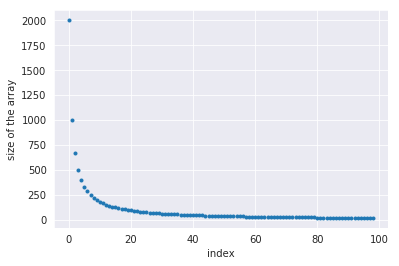

In [24]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 6: A graphical representation of a normal guassian distribution with different sizes. As the index decreases, the size of the array increases and vice versa.

Text(1259.3999999999999, 100, 'expected mean')

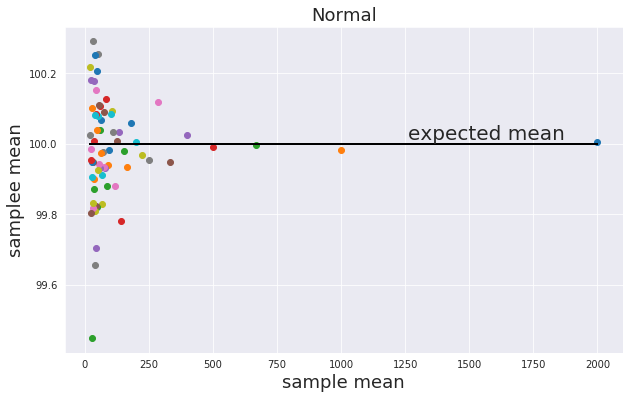

In [25]:
md['lnorm'] = {}

for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)
    
md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
  if not type(nn) == str:
    md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
    axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
    axlnorm_mu_n.set_xlabel('sample mean', fontsize=18)
    axlnorm_mu_n.set_ylabel('samplee mean', fontsize=18)
    axlnorm_mu_n.set_title('Normal', fontsize=18)
    axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                 va="bottom", fontsize=20)

Figure 7: In this figure, there is a large distribution of points ranging from 0 to 2000. Concentrated around 0, there are more points than around 2000. Due to the amount of points present, we can relate this to the law of large numbers claiming that the more times a test is performed (or the larger the population), the more accurate the mean will be. Because of this, we can conclude that the larger the sample size (i.e the one point directly on the mean), the close to the mean the point will be.

Text(0, 0.5, 'N')

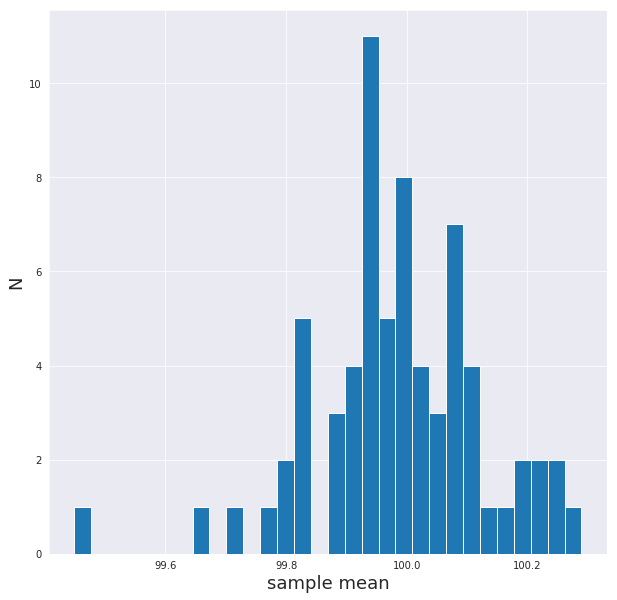

In [26]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 8: Histogram of the mean of all samples of the normal Guassian distribution. Compared to the other histograms, this has a much smaller range of values. Due to this, we can conclude that as the population approaches infinity, the mean will approach a singular value, which can be approximated by this graph as a value around 100.

Poisson Distribution


In [0]:
distributions = ['pois']

In [0]:
mymean = 100

In [0]:
df = mymean

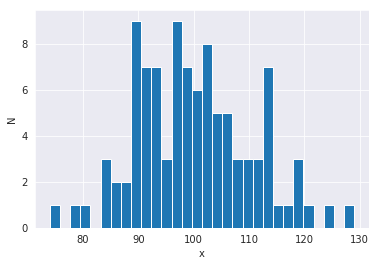

In [30]:
import numpy as np
np.random.seed(456)
md = {}
md['pois'] = np.random.poisson(mymean, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Figure 9: A randomized Poisson distribution for a sample size of 100 and a mean of 100.

In [31]:
print("Pois mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md["pois"].std()))

Pois mean: 99.90, standard deviation: 10.46


In [32]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

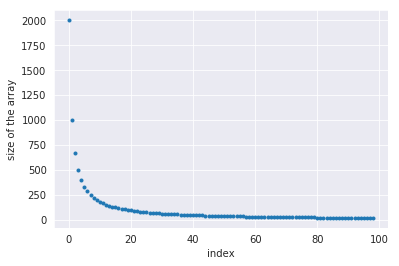

In [33]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 10: A graphical representation of a Poisson distribution with different sizes. As the index decreases, the size of the array increases and vice versa.

Text(1259.3999999999999, 100, 'expected mean')

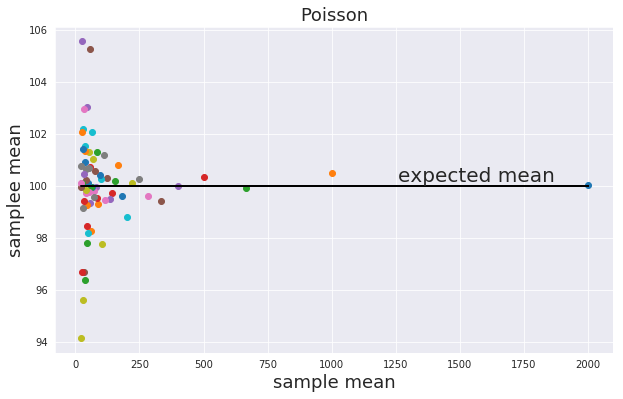

In [34]:
md['pois'] = {}

for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n)
    
md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
  if not type(nn) == str:
    md['pois']['means'][nn] = md['pois'][nn].mean()
    axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
    axpois_mu_n.set_xlabel('sample mean', fontsize=18)
    axpois_mu_n.set_ylabel('samplee mean', fontsize=18)
    axpois_mu_n.set_title('Poisson', fontsize=18)
    axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                 va="bottom", fontsize=20)


Figure 11: In this figure, there is a large distribution of points ranging from 0 to 2000. Concentrated around 0, there are more points than around 2000. Due to the amount of points present, we can relate this to the law of large numbers claiming that the more times a test is performed (or the larger the population), the more accurate the mean will be. Because of this, we can conclude that the larger the sample size (i.e the one point directly on the mean), the close to the mean the point will be.

Text(0, 0.5, 'N')

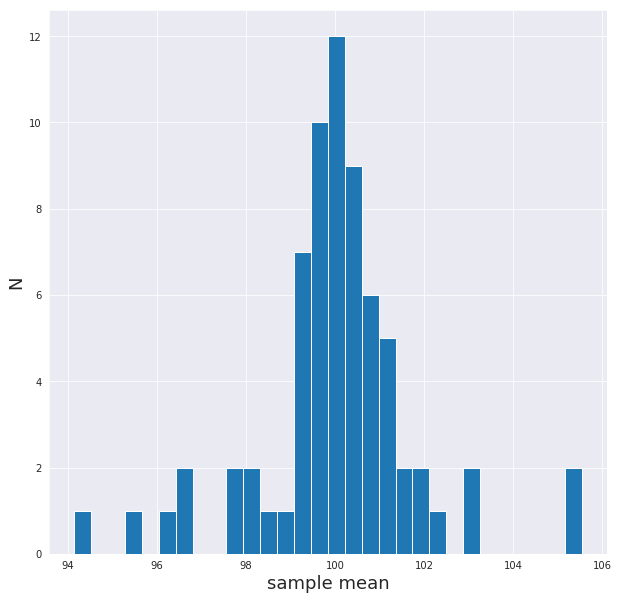

In [35]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 12: Histogram of the mean of all samples of the Poisson distribution. Compared to the other histograms, this has a much smaller range of values. Due to this, we can conclude that as the population approaches infinity, the mean will approach a singular value, which can be approximated by this graph as a value around 100.

Binomial Distribution

In [0]:
distributions = ['binomial']

In [0]:
mymean = 100

In [0]:
df = mymean

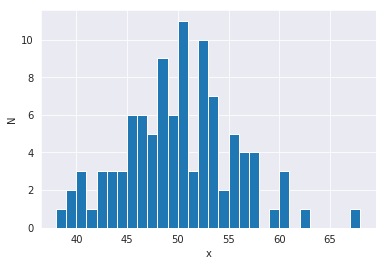

In [40]:
import numpy as np
np.random.seed(456)
md = {}
md['binomial'] = np.random.binomial(mymean, p = 0.5 ,size = 100)
#kept getting an error for not having enough arguments for the Binomial 
#so added a p = 0.7
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Figure 13:  A randomized Binomial distribution for a sample size of 100 and a mean of 100.

In [41]:

print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 49.69, standard deviation: 5.47


In [42]:

mysize = (2000 / (np.array(range(1, 100)))).astype(int)

print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

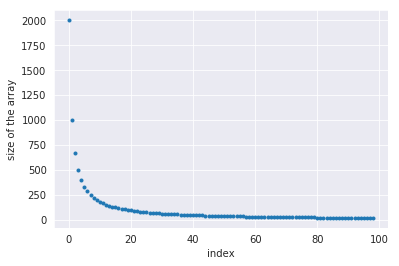

In [43]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 14: A graphical representation of a Binomial distribution with different sizes. As the index decreases, the size of the array increases and vice versa.

Text(1259.3999999999999, 100, 'expected mean')

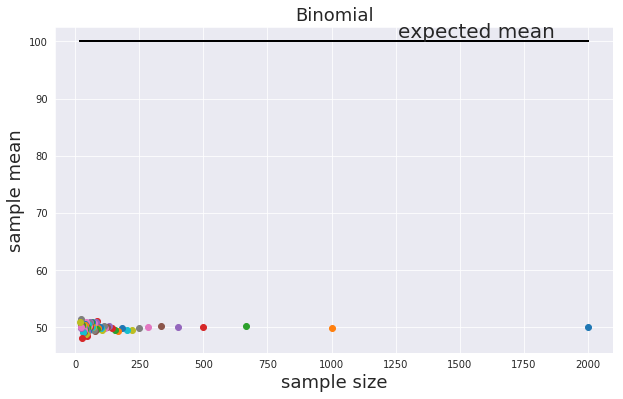

In [44]:
md['binomial'] = {} 


for n in mysize:
    md['binomial'][n] = np.random.binomial(df, p = 0.5,size = n) 

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 15: In this figure, there is a large distribution of points ranging from 0 to 2000. Concentrated around 0, there are more points than around 2000. Due to the amount of points present, we can relate this to the law of large numbers claiming that the more times a test is performed (or the larger the population), the more accurate the mean will be. Because of this, we can conclude that the larger the sample size (i.e the one point directly on the mean), the close to the mean the point will be. However, with this graph, the sample means are much smaller than the expected mean. 

Text(0, 0.5, 'N')

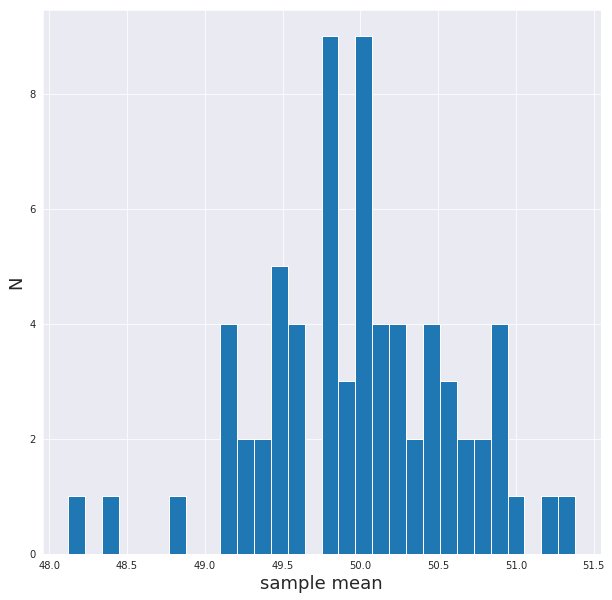

In [45]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 16: Histogram of the mean of all samples of the normal Guassian distribution. Compared to the other histograms, this has a much smaller range of values. Due to this, we can conclude that as the population approaches infinity, the mean will approach a singular value, which can be approximated by this graph as a value around 50.

Gaussian Distribution

In [0]:
distributions = ['log']

In [0]:
mymean = 100 

In [0]:
df = mymean

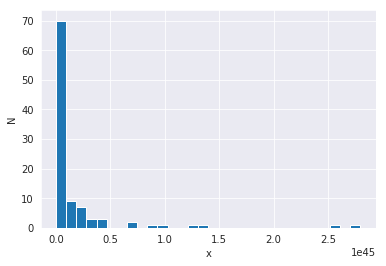

In [51]:
import numpy as np
np.random.seed(456)
md = {}
md['log'] = np.random.lognormal(mymean, sigma = 2, size=100)
pl.hist(md['log'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Figure 17: A randomized Logrithmic distribution for a sample size of 100 and a mean of 100.

In [52]:

print ("Log mean: %.2f, standard deviation: %.2f"%(md['log'].mean(), md['log']

SyntaxError: ignored

In [53]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

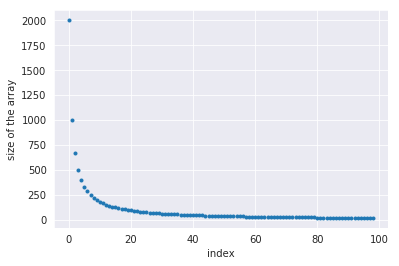

In [54]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 18:  A graphical representation of a Logrithmic distribution with different sizes. As the index decreases, the size of the array increases and vice versa.

Text(1259.3999999999999, 100, 'expected mean')

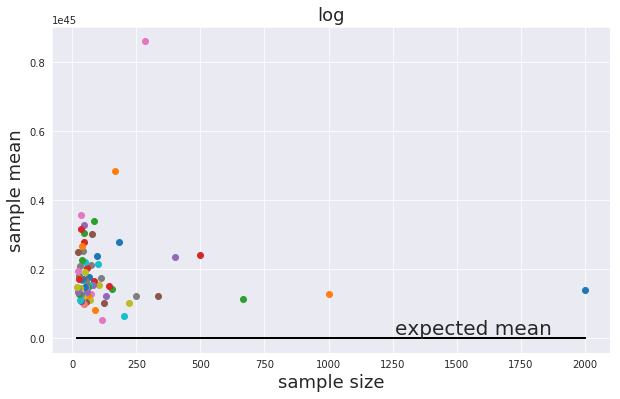

In [56]:
md['log'] = {} 


for n in mysize:
    md['log'][n] = np.random.lognormal(mymean, sigma = 2, size=100) 

md['log']['means'] = {}
axlog_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['log']:
    if not type(nn) == str:
        md['log']['means'][nn] = md['log'][nn].mean()
        axlog_mu_n.plot(nn, md['log']['means'][nn], 'o')
        axlog_mu_n.set_xlabel('sample size', fontsize=18)
        axlog_mu_n.set_ylabel('sample mean', fontsize=18)
        axlog_mu_n.set_title('log', fontsize=18)
        axlog_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlog_mu_n.text(axlog_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 19: In this figure, there is a large distribution of points ranging from 0 to 2000. Concentrated around 0, there are more points than around 2000. Due to the amount of points present, we can relate this to the law of large numbers claiming that the more times a test is performed (or the larger the population), the more accurate the mean will be. Because of this, we can conclude that the larger the sample size (i.e the one point directly on the mean), the close to the mean the point will be. However with this test, the expected mean is 0, causing the points to always be above the mean since they will not be zero. 

Text(0, 0.5, 'N')

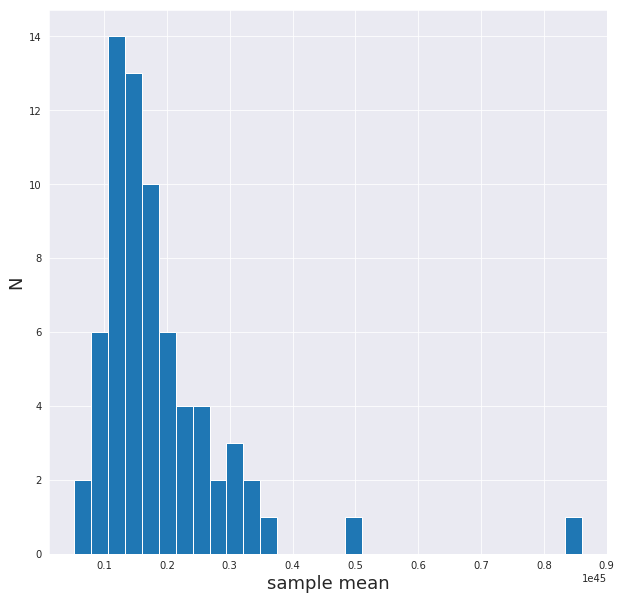

In [57]:
allmeans = list(md['log']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 20: Histogram of the mean of all samples of the Logrithmic distribution. Compared to the other histograms, this has a much smaller range of values. Due to this, we can conclude that as the population approaches infinity, the mean will approach a singular value, which can be approximated by this graph as a value around 0.2.